<a href="https://colab.research.google.com/github/ErascusPlatypus/TomatoLeafClassification/blob/main/tomato_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [33]:
# from google.colab import files
# uploaded = files.upload()

In [34]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d arjuntejaswi/plant-village

# from zipfile import ZipFile

# file_name = "plant-village.zip"
# with ZipFile(file_name, 'r') as zip:
#     zip.extractall()
#     print("done")

In [35]:
IMAGE_SIZE = 64
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 10

In [36]:
dataset = image_dataset_from_directory(
    'PlantVillage/Tomato' , shuffle=True, image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [37]:
for image, label in dataset.take(1):
    print(image.shape, label.numpy())

(16, 64, 64, 3) [4 4 6 6 8 5 7 2 2 6 1 7 7 4 1 4]


In [38]:
print(image[0].shape)

(64, 64, 3)


In [39]:
class_names = dataset.class_names
num_classes = len(class_names)
num_classes

10

In [40]:
len(dataset)

1001

Text(0.5, 1.0, 'Tomato_Septoria_leaf_spot')

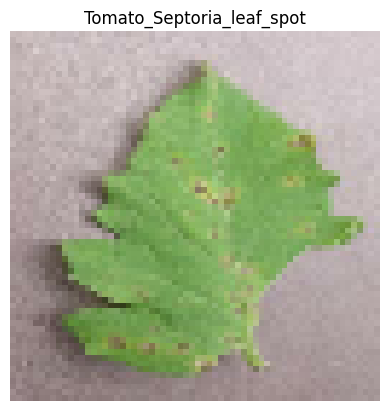

In [41]:
plt.imshow(image[0].numpy().astype('uint8'))
plt.axis('off')
plt.title(class_names[label[0]])

In [42]:
train_size = 0.8
test_size = 0.1
val_size = 0.1

tz = int(train_size * len(dataset))
train_ds = dataset.take(tz)
test_ds = dataset.skip(tz)

len(train_ds) , len(test_ds)

(800, 201)

In [43]:
vz = int(val_size * len(dataset))
val_ds = test_ds.take(vz)
test_ds = test_ds.skip(vz)

len(val_ds) , len(test_ds)

(100, 101)

In [44]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [45]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [46]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [47]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
input_shape

(16, 64, 64, 3)

In [48]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [49]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [50]:
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (16, 64, 64, 3)           0         
                                                                 
 sequential_4 (Sequential)   (16, 64, 64, 3)           0         
                                                                 
 conv2d_4 (Conv2D)           (16, 62, 62, 64)          1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (16, 31, 31, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (16, 29, 29, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (16, 14, 14, 128)         0         
 g2D)                                                 

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [52]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    validation_data=val_ds
)

Epoch 1/10
800/800 - 226s - loss: 1.6688 - accuracy: 0.4036 - val_loss: 1.2861 - val_accuracy: 0.5181 - 226s/epoch - 282ms/step
Epoch 2/10
800/800 - 203s - loss: 1.1459 - accuracy: 0.5901 - val_loss: 0.8639 - val_accuracy: 0.6850 - 203s/epoch - 254ms/step
Epoch 3/10
800/800 - 206s - loss: 0.7416 - accuracy: 0.7361 - val_loss: 0.6215 - val_accuracy: 0.7638 - 206s/epoch - 258ms/step
Epoch 4/10
800/800 - 207s - loss: 0.5968 - accuracy: 0.7855 - val_loss: 0.4689 - val_accuracy: 0.8350 - 207s/epoch - 258ms/step
Epoch 5/10
800/800 - 211s - loss: 0.4736 - accuracy: 0.8303 - val_loss: 0.5424 - val_accuracy: 0.8069 - 211s/epoch - 264ms/step
Epoch 6/10
800/800 - 204s - loss: 0.4321 - accuracy: 0.8465 - val_loss: 0.4945 - val_accuracy: 0.8319 - 204s/epoch - 256ms/step
Epoch 7/10
800/800 - 200s - loss: 0.3805 - accuracy: 0.8641 - val_loss: 0.4611 - val_accuracy: 0.8394 - 200s/epoch - 249ms/step
Epoch 8/10
800/800 - 201s - loss: 0.3443 - accuracy: 0.8799 - val_loss: 0.2633 - val_accuracy: 0.9144 - 

In [53]:
scores = model.evaluate(test_ds)

101/101 [==============================] - 15s 63ms/step - loss: 0.3121 - accuracy: 0.8839


In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

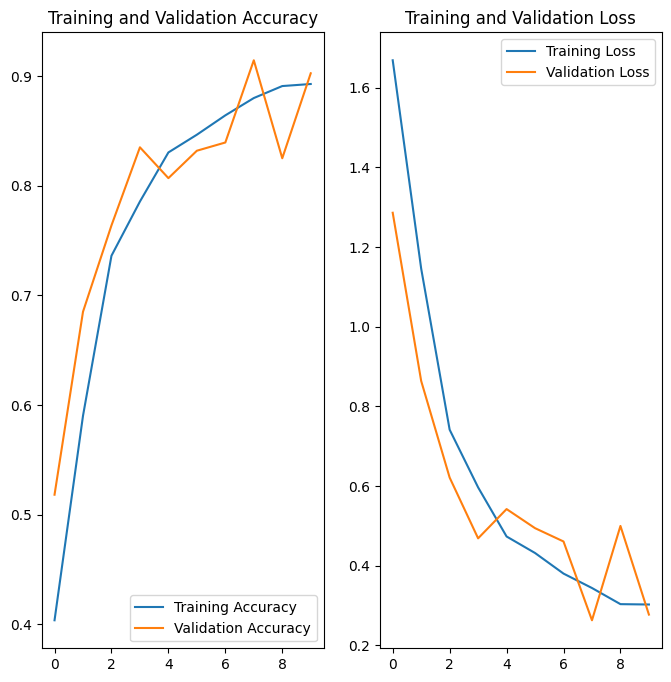

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 0s 220ms/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


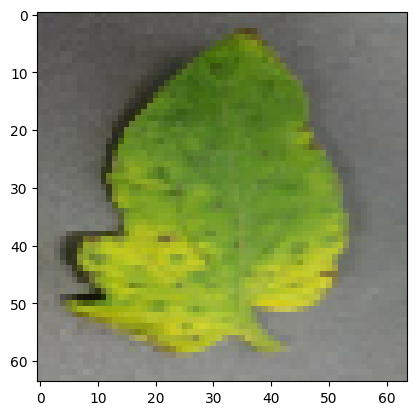

In [56]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


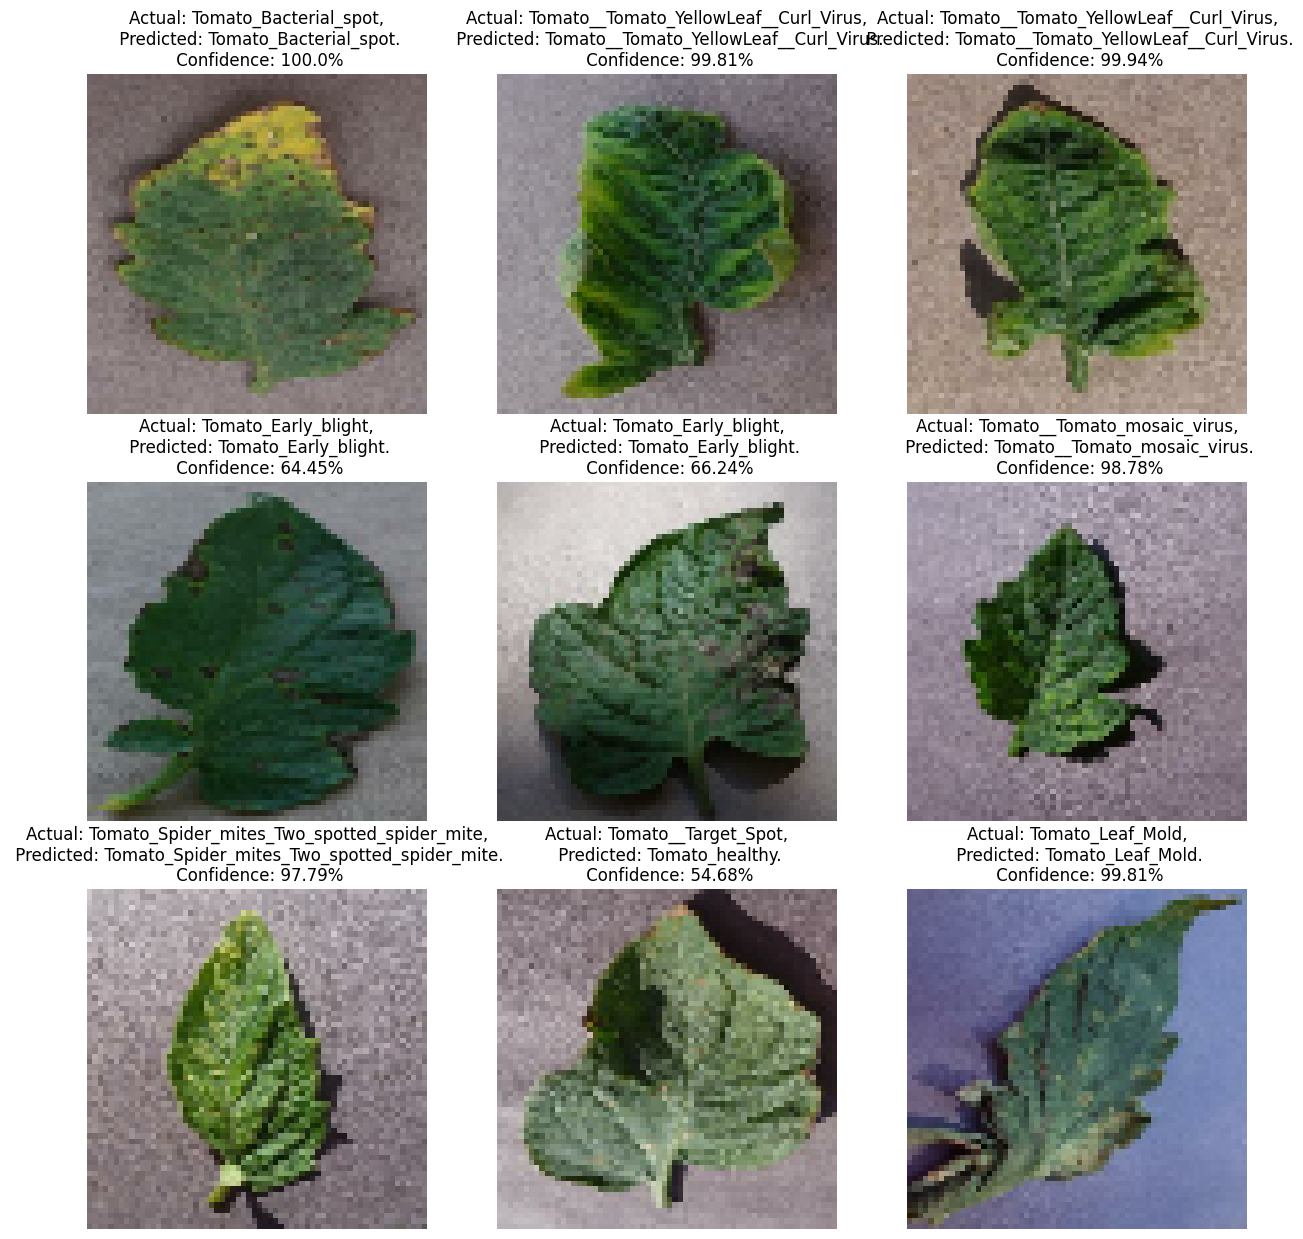

In [58]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")